In [3]:
import pandas as pd
import os
from os.path import join

### Load in all files and display them

In [4]:
data_dir = "..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp"
files = []
for file in os.listdir(data_dir):
    files.append(join(data_dir, file))
files.sort()
print(files)

['..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp\\admissions.csv.gz', '..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp\\d_hcpcs.csv.gz', '..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp\\d_icd_diagnoses.csv.gz', '..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp\\d_icd_procedures.csv.gz', '..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp\\d_labitems.csv.gz', '..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp\\diagnoses_icd.csv.gz', '..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp\\drgcodes.csv.gz', '..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp\\emar.csv.gz', '..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp\\emar_detail.csv.gz', '..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp\\hcpcsevents.csv.gz', '..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp\\labevents.csv.gz', '..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp\\microbiologyevents.csv.gz', '..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp\\omr.csv.gz', '..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp\\patients.csv.gz', '..\\data\\raw\\

### Inspect Admissions

In [5]:
admissions = pd.read_csv(files[0], nrows=1000)
admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0


In [14]:
admissions = admissions.sort_values(['subject_id', 'admittime'])

# compute time between discharge of the last admission and admittime of the next admission
admissions['next_admittime'] = admissions.groupby('subject_id')['admittime'].shift(-1)
admissions['time_between'] = admissions['next_admittime'] - admissions['dischtime']
# remove the temporary 'next_admittime' column
admissions = admissions.drop(columns='next_admittime')
admissions.time_between = admissions.time_between.dt.total_seconds() / 60 / 60 / 24
admissions.time_between.describe()

count     573.000000
mean      315.395876
std       481.198888
min         0.000000
25%        16.087500
50%        89.375000
75%       441.563889
max      3069.990972
Name: time_between, dtype: float64

<AxesSubplot:>

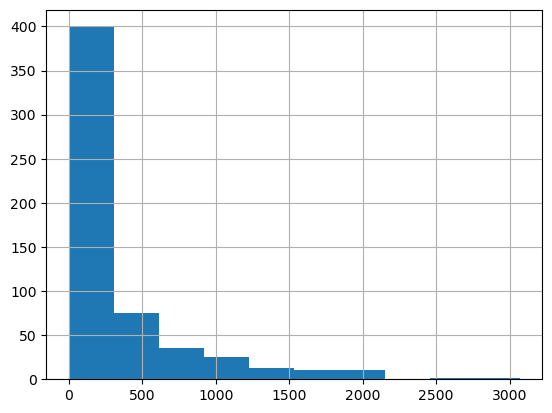

In [15]:
admissions.time_between.hist()